## Classification metrics

Choosing right evaluation metrics for the problem is one of the most important aspect of machine learning. Choice of metrics allows us to compare performance of different models and helps in model selection.

In this task, we will explore following metrics:
- confusion matrix
- accuracy
- precision
- recall
- f1 score

#### Dataset
The training dataset is available at "data/ozone_levels_train.csv" in the respective challenge' repo.<br>
The testing dataset is available at "data/ozone_levels_test.csv" in the respective challenge' repo.<br>

The dataset is __modified version__ of the dataset 'ozone level' on provided by UCI Machine Learning repository.

Original dataset: https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

#### Objective
To learn about classification metrics and compare logistic regression and decision tree on the same dataset

#### Tasks
- define X(input) and Y(output)
- train the decision tree model 
- train the logistic model
- construct a confusion matrix
- calculate the classification accurace
- calculate the Precision
- calculate the Recall
- calculate the F1 score
- calculate Area Under ROC Curve

#### Further fun
- Calculate precission and recall
- find the area under the curve for Roc metrics
- impliment below metrics using inbuilt librarires
        confusion matrix
        accuracy
        precision
        recall
        f1 score


#### Helpful links
- Classification metrics with google developers: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative
- classification metrics: https://www.kdnuggets.com/2020/04/performance-evaluation-metrics-classification.html
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Understanding classification metrics like Precision, Recall, F-Scores and Confusion matrices: https://nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/
- Understanding the ROC Curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Uncomment below 2 lines to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [19]:
# Download data using wget if running on cloud
!wget https://github.com/DeepConnectAI/challenge-week-5/raw/master/data/ozone_levels_train.csv
!wget https://github.com/DeepConnectAI/challenge-week-5/raw/master/data/ozone_levels_test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
# Load the train and test data
train = pd.read_csv('data/ozone_levels_train.csv')
test  = pd.read_csv("data/ozone_levels_test.csv")

In [21]:
# Explore train dataset
train.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,2.5,3.5,4.4,4.6,4.4,3.5,4.2,4.5,4.2,4.6,...,0.07,26.29,-2.37,5705.0,-19.40,23.40,10315.0,-0.130416,0.00,0.0
1,1.2,0.7,0.3,0.1,0.3,0.4,0.6,1.1,1.9,2.4,...,0.24,15.80,2.10,5710.0,-17.50,19.00,10210.0,15.000000,0.00,0.0
2,0.1,0.4,0.6,0.4,1.0,1.7,0.7,1.3,2.3,2.4,...,0.12,31.64,-5.24,5745.0,-16.90,25.90,10175.0,85.000000,0.00,0.0
3,0.6,0.9,1.0,0.6,0.7,0.7,0.8,1.4,2.6,2.6,...,0.19,1.22,-0.28,5835.0,-9.55,42.15,10215.0,5.000000,0.00,0.0
4,0.1,0.4,0.3,0.1,0.1,0.0,0.9,1.9,2.0,2.0,...,0.87,1.65,1.51,5835.0,32.95,47.30,10170.0,15.000000,0.97,0.0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 73 columns):
F_0      1775 non-null float64
F_1      1775 non-null float64
F_2      1775 non-null float64
F_3      1775 non-null float64
F_4      1775 non-null float64
F_5      1775 non-null float64
F_6      1775 non-null float64
F_7      1775 non-null float64
F_8      1775 non-null float64
F_9      1775 non-null float64
F_10     1775 non-null float64
F_11     1775 non-null float64
F_12     1775 non-null float64
F_13     1775 non-null float64
F_14     1775 non-null float64
F_15     1775 non-null float64
F_16     1775 non-null float64
F_17     1775 non-null float64
F_18     1775 non-null float64
F_19     1775 non-null float64
F_20     1775 non-null float64
F_21     1775 non-null float64
F_22     1775 non-null float64
F_23     1775 non-null float64
F_24     1775 non-null float64
F_25     1775 non-null float64
F_26     1775 non-null float64
F_27     1775 non-null float64
F_28     1775 non-null fl

In [23]:
# Explore test dataset
test.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,4.0,3.7,2.9,3.6,2.4,2.9,2.0,2.0,3.2,3.8,...,0.47,27.66,11.94,5605.0,10.70,31.95,10240.0,10.0,0.0,0.0
1,2.2,2.9,3.4,4.2,4.7,4.7,5.3,4.9,5.2,6.0,...,0.20,19.22,18.21,5515.0,-10.10,42.00,10065.0,25.0,0.0,0.0
2,2.7,2.2,2.3,2.5,2.6,2.9,3.2,2.9,3.6,4.2,...,0.10,14.22,-2.98,5690.0,0.70,32.70,10105.0,-55.0,0.0,0.0
3,1.5,1.3,1.8,1.4,1.2,1.7,1.6,1.4,1.6,3.0,...,0.54,13.07,9.15,5820.0,1.95,39.35,10220.0,-25.0,0.0,0.0
4,2.6,2.7,2.2,1.4,1.6,1.9,2.6,3.5,4.2,4.5,...,0.26,-1.52,-4.53,5910.0,27.70,43.70,10110.0,-30.0,0.0,0.0


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 73 columns):
F_0      761 non-null float64
F_1      761 non-null float64
F_2      761 non-null float64
F_3      761 non-null float64
F_4      761 non-null float64
F_5      761 non-null float64
F_6      761 non-null float64
F_7      761 non-null float64
F_8      761 non-null float64
F_9      761 non-null float64
F_10     761 non-null float64
F_11     761 non-null float64
F_12     761 non-null float64
F_13     761 non-null float64
F_14     761 non-null float64
F_15     761 non-null float64
F_16     761 non-null float64
F_17     761 non-null float64
F_18     761 non-null float64
F_19     761 non-null float64
F_20     761 non-null float64
F_21     761 non-null float64
F_22     761 non-null float64
F_23     761 non-null float64
F_24     761 non-null float64
F_25     761 non-null float64
F_26     761 non-null float64
F_27     761 non-null float64
F_28     761 non-null float64
F_29     761 non-null flo

In [28]:
# Define X and y
X_train = train.drop('class', axis=1)
X_test  = test.drop('class', axis=1)
y_train = train['class']
y_test  = test['class']

In [29]:
# Print shape of X_train, X_test, y_train, y_test
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"


X_train: (1775, 72) , y_train: (1775,)
X_test: (761, 72) , y_test: (761,)


In [32]:
# Initialize the models
# Classifier 1 - Logistic regression
clf1 = LogisticRegression(max_iter=10000)
# Classifier 2 - Decision tree
clf2 = DecisionTreeClassifier()

In [34]:
# Train both the models on training dataset
clf1.fit(X_train, y_train)






LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
# Predict on testing data
y_pred_lr = clf1.predict(X_test)
y_pred_dt = clf2.predict(X_test)
sum(y_pred_lr ==  y_test)/ len(y_test) , sum(y_pred_dt ==  y_test)/ len(y_test)

(0.9671484888304862, 0.9434954007884363)

### Primary building blocks of classification metrics

A __TRUE POSITIVE (TP)__ is an outcome where the model correctly predicts the positive class.

A __TRUE NEGATIVE (TN)__ is an outcome where the model correctly predicts the negative class.

A __FALSE POSITIVE (FP)__ is an outcome where the model incorrectly predicts the positive class.

a __FALSE NEGATIVE (FN)__ is an outcome where the model incorrectly predicts the negative class.

In [37]:
# Compute primary metrics for logisitc regression
# NOTE: All metrics are to be calculated on test dataset
# True Positive
lr_true_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_lr[i] == 1])
# True Negative
lr_true_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_lr[i] == 0])
# False Positive
lr_false_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_lr[i] == 1])
# False Negative
lr_false_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_lr[i] == 0])

In [38]:
# Compute primary metrics for decision tree
# True Positive
dt_true_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_dt[i] == 1])
# True Negative
dt_true_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_dt[i] == 0])
# False Positive
dt_false_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_dt[i] == 1])
# False Negative
dt_false_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_dt[i] == 0])

### Confusion matrix
A confusion matrix is visualization technique to summarize the basic performance of a classification algorithm.

![Confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg "Confusion matric diagram")

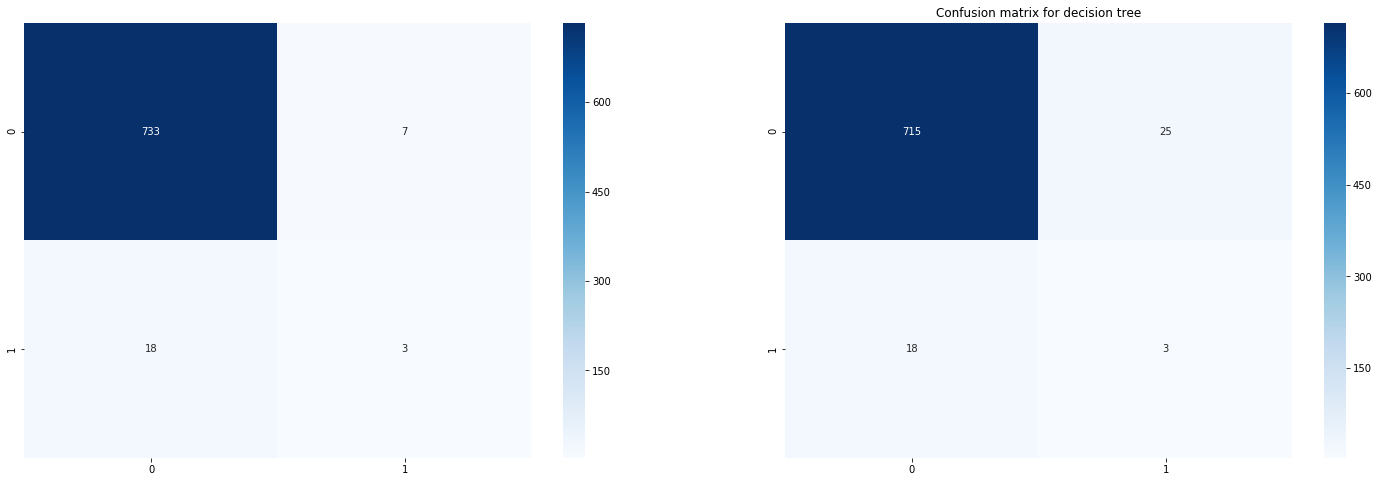

In [39]:
# Plot confusion matrix, DO NOT EDIT THE CELL
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.title("Confusion matrix for logistic regression")
sns.heatmap(np.array([[lr_true_negative, lr_false_positive],[lr_false_negative, lr_true_positive]]), annot=True, cmap=plt.cm.Blues, fmt='g', ax=axes[0])
plt.title("Confusion matrix for decision tree")
sns.heatmap(np.array([[dt_true_negative, dt_false_positive],[dt_false_negative, dt_true_positive]]), annot=True, cmap=plt.cm.Blues, fmt='g', ax=axes[1])

plt.show()

### Accuracy 
Classification accuracy is simply the rate of correct classifications
$$Accuracy = \frac{Number \, of \, correct \, predictions}{Total \, number \, of \, predictions}$$
<br>
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [40]:
# Classification accuracy for logistic regression
lr_accuracy = (lr_true_negative+lr_true_positive)/(lr_false_negative+lr_false_positive+lr_true_negative+lr_true_positive)
# Classification accuracy for decision tree
dt_accuracy = (dt_true_negative+dt_true_positive)/(dt_false_negative+dt_false_positive+dt_true_negative+dt_true_positive)

In [41]:
print("Classificaton accuracy: LR = " , lr_accuracy)
print("Classificaton accuracy: DT = " , dt_accuracy)

Classificaton accuracy: LR =  0.9671484888304862
Classificaton accuracy: DT =  0.9434954007884363


### Precision
What proportion of positive identifications was actually correct?
$$Precision = \frac{TP}{TP+FP}$$

In [42]:
# Precision for logistic regression
try:
    lr_precision = lr_true_positive/(lr_true_positive+lr_false_positive)
except:
    lr_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for logistic regression turned out to be 0 ")
# Precision for decision tree
try:
    dt_precision = dt_true_positive/(dt_true_positive+dt_false_positive)
except:
    dt_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for decision tree turned out to be 0 ")

In [43]:
print("Precision: LR = " , lr_precision)
print("Precision: DT = " , dt_precision)

Precision: LR =  0.3
Precision: DT =  0.10714285714285714


### Recall
What proportion of actual positives was identified correctly?
$$Recall = \frac{TP}{TP+FN}$$

In [44]:
# Recall for logistic regression
try:
    lr_recall = lr_true_positive / (lr_true_positive + lr_false_negative)
except:
    lr_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for logistic regression turned out to be 0 ")
# Recall for decision tree
try:
    dt_recall = dt_true_positive / (dt_true_positive + dt_false_negative) 
except:
    dt_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for decision tree turned out to be 0 ")

In [45]:
print("Recall: LR = " , lr_recall)
print("Recall: DT = " , dt_recall)

Recall: LR =  0.14285714285714285
Recall: DT =  0.14285714285714285


### F1 score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
$$ F1 \, score = \frac{2* Precision * Recall}{Precision + Recall}$$

In [46]:
# F1 score for logistic regression
lr_f1_score = (2*lr_precision*lr_recall)/(lr_precision+lr_recall)
# F1 score for decision tree
dt_f1_score = (2*dt_precision*dt_recall)/(dt_precision+dt_recall)

In [47]:
print("F1 score: LR = " , lr_f1_score)
print("F1 score: DT = " , dt_f1_score)

F1 score: LR =  0.19354838709677416
F1 score: DT =  0.12244897959183672


### Area Under ROC Curve
A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [ ]:
# False positive rate for logisitic regression
lr_false_positive_rate = 
# True positive rate for logisitic regression
lr_true_positive_rate = 
# False positive rate for decision trees
dt_false_positive_rate = 
# True positive rate for decision trees
dt_true_positive_rate = 

In [ ]:
# TODO: Plot the ROC curve
plt.plot()
plt.plot()
plt.show()